In [1]:
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 1. Normalize the images to [0, 1] range
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 2. Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)  # CIFAR-10 has 10 classes
y_test = to_categorical(y_test, 10)

# 3. Check the shapes of the data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Step 1: Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Step 2: Build the model
model = Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),  # Input layer for 32x32 RGB images

    # First block
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    # Second block
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    # Third block
    Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),

    # Fully connected layers
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Step 3: Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Step 5: Train the model with data augmentation
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    steps_per_epoch=X_train.shape[0] // 64,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)

# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


Epoch 1/100


c:\Users\Discount Laptop\anaconda3\envs\tf_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 1052s 1s/step - accuracy: 0.3302 - loss: 3.8560 - val_accuracy: 0.3590 - val_loss: 3.4397 - learning_rate: 0.0010
Epoch 2/100
  1/781 ━━━━━━━━━━━━━━━━━━━━ 12:54 993ms/step - accuracy: 0.4531 - loss: 2.5180

c:\Users\Discount Laptop\anaconda3\envs\tf_env\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.4531 - loss: 2.5180 - val_accuracy: 0.3426 - val_loss: 3.5391 - learning_rate: 0.0010
Epoch 3/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 753s 964ms/step - accuracy: 0.5596 - loss: 2.3611 - val_accuracy: 0.5984 - val_loss: 2.0104 - learning_rate: 0.0010
Epoch 4/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.5938 - loss: 1.8918 - val_accuracy: 0.6067 - val_loss: 1.9873 - learning_rate: 0.0010
Epoch 5/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 798s 1s/step - accuracy: 0.6411 - loss: 1.8334 - val_accuracy: 0.5860 - val_loss: 2.0126 - learning_rate: 0.0010
Epoch 6/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 34s 42ms/step - accuracy: 0.6406 - loss: 1.7169 - val_accuracy: 0.5957 - val_loss: 1.9521 - learning_rate: 0.0010
Epoch 7/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 832s 1s/step - accuracy: 0.6721 - loss: 1.6950 - val_accuracy: 0.7113 - val_loss: 1.6148 - learning_rate: 0.0010
Epoch 8/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.7031 - loss: 

KeyboardInterrupt: 

In [4]:
%%time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Build the model
model = Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),     # Input layer for 32x32 RGB images
    Conv2D(64, (3, 3), activation='relu'),    # 2nd Conv2D layer
    MaxPooling2D(pool_size=(2, 2)),           # MaxPooling layer
    Conv2D(128, (3, 3), activation='relu'),   # 3rd Conv2D layer
    MaxPooling2D(pool_size=(2, 2)),           # MaxPooling layer
    Conv2D(256, (3, 3), activation='relu'),   # 4th Conv2D layer
    MaxPooling2D(pool_size=(2, 2)),           # MaxPooling layer
    Flatten(),                               # Flatten layer to 1D
    Dense(512, activation='relu'),            # Fully connected layer
    Dropout(0.5),                            # Dropout layer to prevent overfitting
    Dense(10, activation='softmax')           # Output layer (10 classes)
])

# Step 2: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Suitable for one-hot encoded labels
              metrics=['accuracy'])

# Step 3: Summary of the model architecture
model.summary()

# Step 4: Train the model
# Using early stopping to prevent overfitting and monitoring validation accuracy
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=50,
                    validation_data=(X_test, y_test),  # Validation on the test data
                    callbacks=[early_stopping])

# Step 5: Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 900,746 (3.44 MB)

 Trainable params: 900,746 (3.44 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 115s 142ms/step - accuracy: 0.3144 - loss: 1.8255 - val_accuracy: 0.5634 - val_loss: 1.2147
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 125s 160ms/step - accuracy: 0.5788 - loss: 1.1858 - val_accuracy: 0.6423 - val_loss: 1.0186
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 162ms/step - accuracy: 0.6596 - loss: 0.9708 - val_accuracy: 0.6829 - val_loss: 0.8954
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 132s 169ms/step - accuracy: 0.7096 - loss: 0.8261 - val_accuracy: 0.6958 - val_loss: 0.8650
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 121ms/step - accuracy: 0.7439 - loss: 0.7315 - val_accuracy: 0.7179 - val_loss: 0.8177
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 127ms/step - accuracy: 0.7734 - loss: 0.6426 - val_accuracy: 0.7384 - val_loss: 0.7689
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 108s 138ms/step - accuracy: 0.8022 - loss: 0.5659 - val_accuracy: 0.7356 - val_loss: 0.7790
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 180s 186ms/step - accuracy: 0.8215 - l

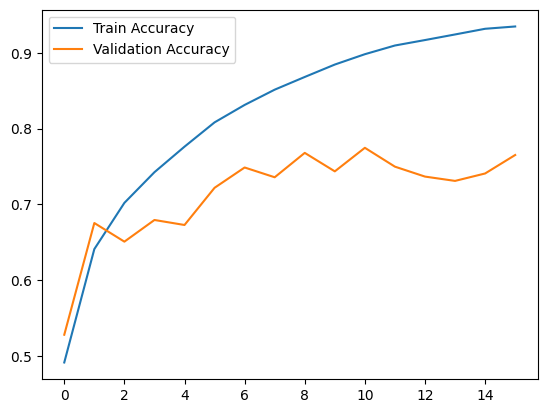

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [4]:
# model.save('models/cifar10_dataset.h5')

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


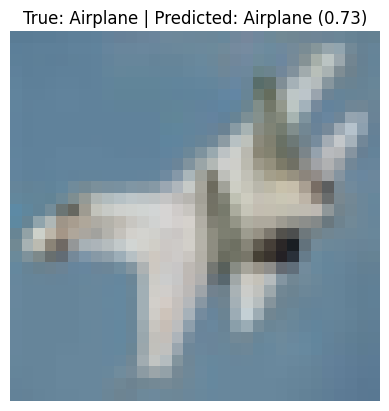

Predicted Class: Airplane, Confidence: 0.73


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Class labels for CIFAR-10 dataset
class_labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
                'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

def predict_cifar10_image(index):
    """
    Predict and visualize a specific image from the CIFAR-10 dataset.
    Args:
        index (int): Index of the image in the CIFAR-10 test set.
    """
    # Select the image and its true label
    image = X_test[index]
    true_label = np.argmax(y_test[index])

    # Preprocess the image (already normalized)
    img_array = np.expand_dims(image, axis=0)  # Add batch dimension

    # Predict the class
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    confidence = np.max(prediction)

    # Display the image
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"True: {class_labels[true_label]} | Predicted: {class_labels[predicted_class]} ({confidence:.2f})")
    plt.show()

    return class_labels[predicted_class], confidence

# Example usage: Predict the image at index 10
index = 10  # Change the index to test different images
predicted_class, confidence = predict_cifar10_image(index)
print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


<Axes: >

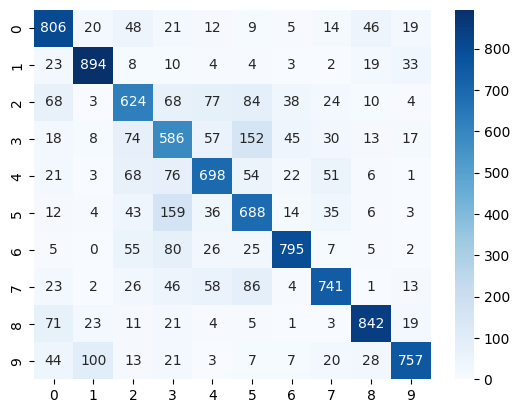

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [26]:
# Ensure consistent normalization
random_image_normalized = random_image / 255.0  # Normalize to [0, 1]

# Expand dimensions for batch prediction
random_image_normalized = np.expand_dims(random_image_normalized, axis=0)

# Make a prediction
predicted_class_probs = model.predict(random_image_normalized)
predicted_label = np.argmax(predicted_class_probs, axis=1)[0]

# Print confidence scores
confidence_scores = {class_names[i]: predicted_class_probs[0][i] for i in range(len(class_names))}
print(f"Confidence Scores: {confidence_scores}")

# Map true and predicted labels
true_class_name = class_names[true_label]
predicted_class_name = class_names[predicted_label]

# Print results
print(f"True class: {true_class_name}")
print(f"Predicted class: {predicted_class_name}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Confidence Scores: {'airplane': 0.5624043, 'automobile': 0.018198606, 'bird': 0.02727642, 'cat': 0.074592374, 'deer': 0.02672425, 'dog': 0.001314, 'frog': 0.013339153, 'horse': 0.0004241717, 'ship': 0.2574288, 'truck': 0.018297931}
True class: airplane
Predicted class: airplane


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    horizontal_flip=True
)
datagen.fit(X_train)

# Train using augmented data
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])


Epoch 1/50


c:\Users\Discount Laptop\anaconda3\envs\tf_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 210s 266ms/step - accuracy: 0.6837 - loss: 0.9088 - val_accuracy: 0.7253 - val_loss: 0.8063
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 200s 254ms/step - accuracy: 0.7046 - loss: 0.8527 - val_accuracy: 0.7295 - val_loss: 0.8181
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 203s 259ms/step - accuracy: 0.7180 - loss: 0.8199 - val_accuracy: 0.7260 - val_loss: 0.8358


In [19]:
%%time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam



# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# Load the Pretrained ResNet50 Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model
base_model.trainable = False

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks: EarlyStopping and Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model with Data Augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, lr_scheduler])

# Fine-tune the Pretrained Model
# Unfreeze the last few layers of the base model
base_model.trainable = True
for layer in base_model.layers[:-10]:
    layer.trainable = False

# Recompile the model with a smaller learning rate
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model
history_fine_tune = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                              epochs=30,
                              validation_data=(X_test, y_test),
                              callbacks=[early_stopping, lr_scheduler])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Final Test Accuracy: {test_acc * 100:.2f}%")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 79s 1us/step
Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 362s 450ms/step - accuracy: 0.1214 - loss: 3.3060 - val_accuracy: 0.2035 - val_loss: 2.2513 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 330s 421ms/step - accuracy: 0.1417 - loss: 2.2735 - val_accuracy: 0.2190 - val_loss: 2.1624 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 313s 399ms/step - accuracy: 0.1496 - loss: 2.2361 - val_accuracy: 0.2148 - val_loss: 2.1584 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 362s 463ms/step - accuracy: 0.1451 - loss: 2.2316 - val_accuracy: 0.2201 - val_loss: 2.1719 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 728s 931ms/step - accuracy: 0.1465 - loss: 2.2257 - val_accuracy: 0.2050 - val_loss: 2.2037 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 502ms/step - accuracy: 0.1476 - loss: 2.2221

KeyboardInterrupt: 